In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
data.head(10)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
X = data.drop('0',axis = 1)
y = data['0']

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.8)

In [4]:
x_train = np.reshape(x_train.values, (x_train.shape[0], 28,28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28,28))

print("Shape of Training data: ", x_train.shape)
print("Shape of Testing data: ", x_test.shape)

Shape of Training data:  (74490, 28, 28)
Shape of Testing data:  (297960, 28, 28)


In [5]:
shuffle_data = shuffle(x_train)

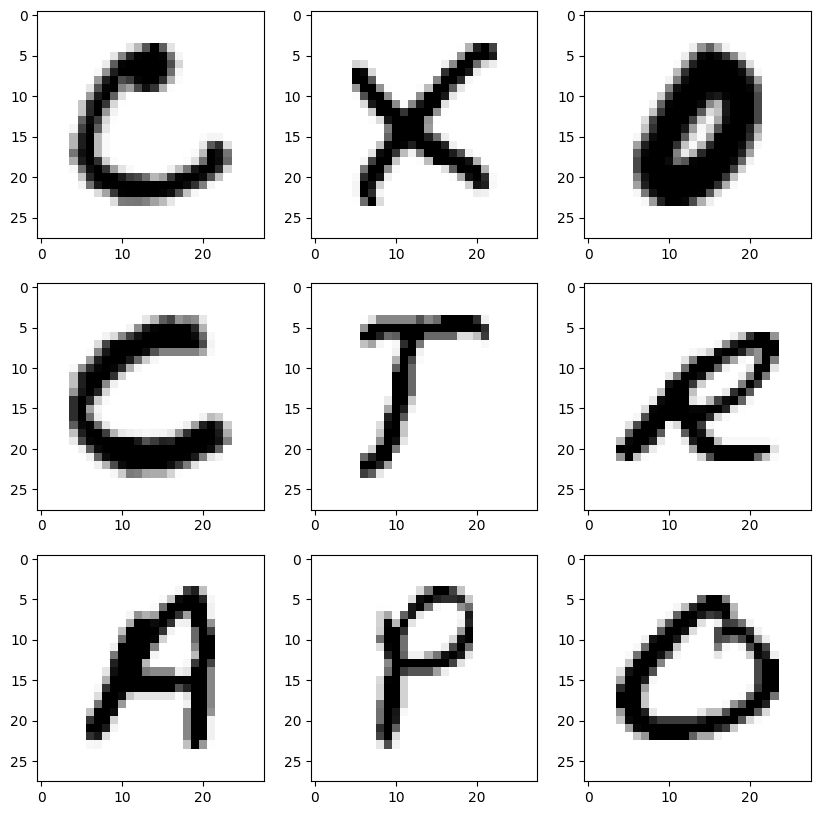

In [6]:
import cv2
fig, axes = plt.subplots(3,3, figsize = (10,10))
axes = axes.flatten()
for i in range(9):
    _, shu = cv2.threshold(shuffle_data[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuffle_data[i], (28,28)), cmap="Greys")
plt.show()

In [7]:
#training of our model.
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)
print("New shape of training data: ", x_train.shape)
print("New shape of testing data: ", x_test.shape)

New shape of training data:  (74490, 28, 28, 1)
New shape of testing data:  (297960, 28, 28, 1)


In [8]:
import tensorflow
from keras.utils import to_categorical
y_training = to_categorical(y_train, num_classes = 26, dtype='int')
y_testing = to_categorical(y_test, num_classes = 26, dtype='int')

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [10]:
model = Sequential()
 
model.add(Conv2D(64 , (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(2, 2))
 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2,2))
 
model.add(Flatten())
 
model.add(Dense(128,activation ="relu"))
model.add(Dense(256,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [12]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_training, epochs=5,  validation_data = (x_test,y_testing))

Epoch 1/5
2328/2328 [==============================] - 316s 135ms/step - loss: 0.3924 - accuracy: 0.8875 - val_loss: 0.1921 - val_accuracy: 0.9421
Epoch 2/5
2328/2328 [==============================] - 297s 127ms/step - loss: 0.1700 - accuracy: 0.9499 - val_loss: 0.1697 - val_accuracy: 0.9503
Epoch 3/5
2328/2328 [==============================] - 321s 138ms/step - loss: 0.1372 - accuracy: 0.9595 - val_loss: 0.1261 - val_accuracy: 0.9640
Epoch 4/5
2328/2328 [==============================] - ETA: 0s - loss: 0.1190 - accuracy: 0.9649

KeyboardInterrupt: 

In [24]:
model.save(r'handwritten_character_recog_model1.h5')

In [25]:
words = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

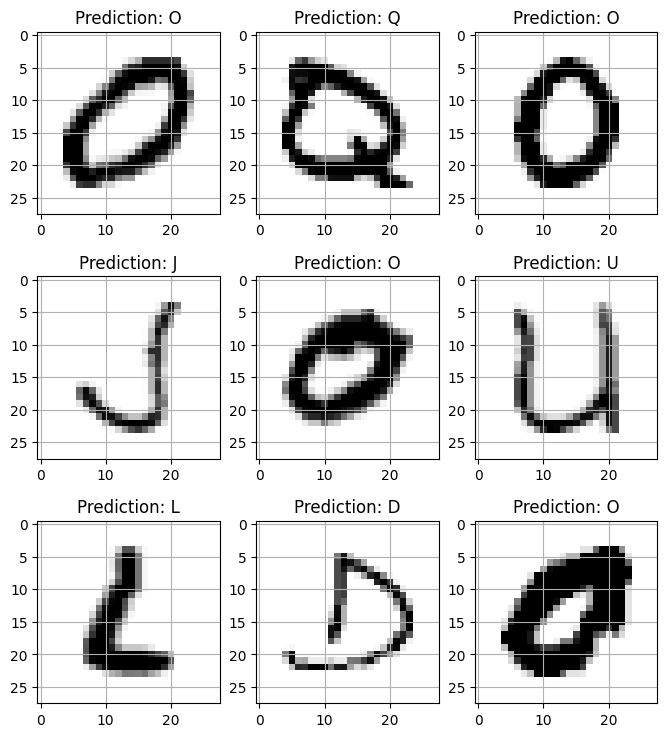

In [26]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    image = np.reshape(x_test[i], (28,28))
    ax.imshow(image, cmap="Greys")
    pred = words[np.argmax(y_testing[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()